# I- Manipulation du contraste, Transformations Log

### Import libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Lecture d'image

In [2]:
# charger l'image dans la matrice img
path = 'source/pout.tif'
img = cv.imread(path, 0)

## I.1- Manipulation du Contraste

In [3]:
# 1-calculer min et max
_min = np.min(img)
_max = np.max(img)

# 2-calculer img1 après augmentation du contraste
img1 = 255.0 * (img - _min) / (_max - _min)

# caster les valeurs de la matrice img1 vers 'unsigned int'
img1 = np.array(img1, dtype=np.uint8)

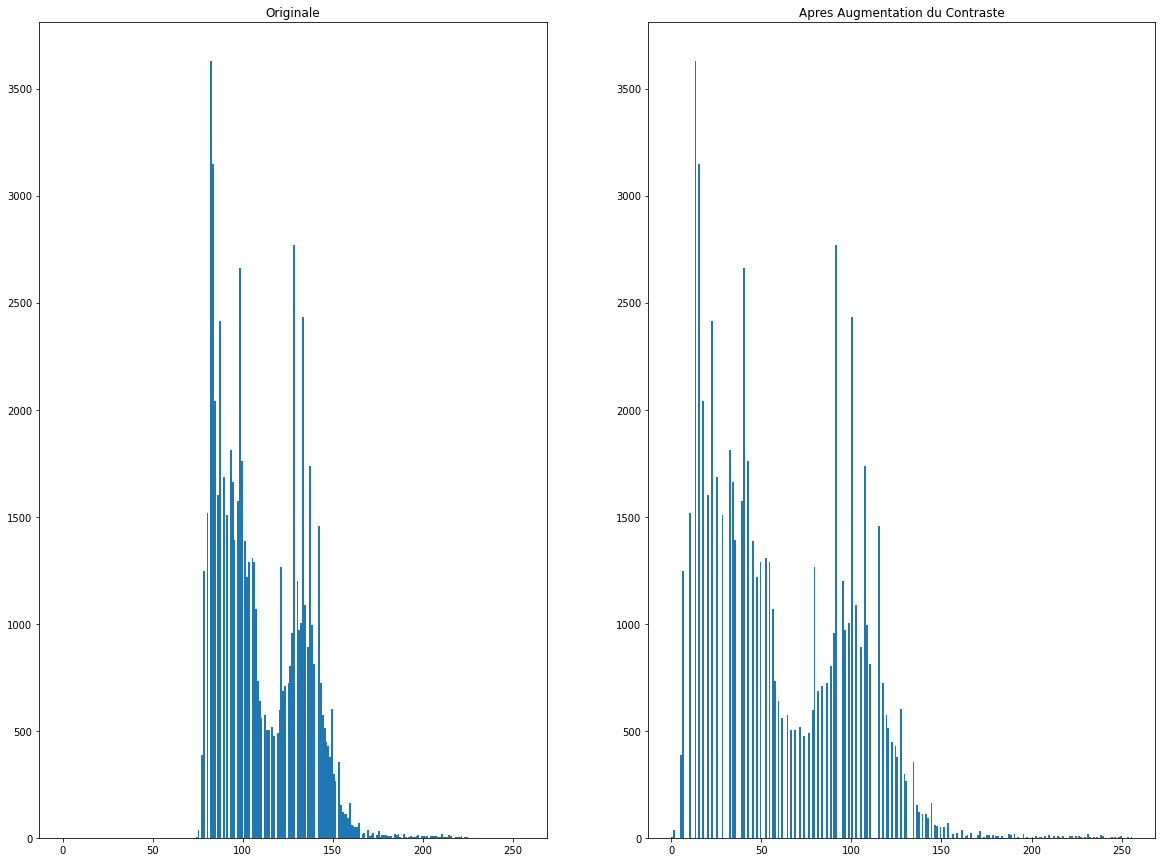

In [4]:


# calcul et affichage de l'histogramme
fig, ax = plt.subplots(1, 2, figsize=(20,15))

ax[0].hist(img.ravel(), 256, [0, 256])
ax[0].set_title(label="Originale")

ax[1].hist(img1.ravel(), 256, [0, 256])
ax[1].set_title(label="Apres Augmentation du Contraste")

plt.show()

# affichage des images
cv.imshow('Originale', img)
cv.imshow('Apres Augmentation du Contraste', img1)
# attendre la fermeture des fenètres
cv.waitKey(delay=0)
cv.destroyAllWindows()


## I.2- Transformations Log

In [5]:
# calculer la constante C
C = 255.0 / (np.log(1 + np.max(img)))

# calcul de la Transformee de Fourier
fft = np.fft.ifft2(img)
fft = np.fft.fftshift(fft) # decalage vers le centre
fft = np.abs(fft)


# Application des transformations LOG pour l'image
img1 = C * np.log(1 + img)
img1 = np.array(img1, dtype=np.uint8)


# Application des transformations LOG pour la transformee de Fourier
fft1 = C * np.log(1 + fft)


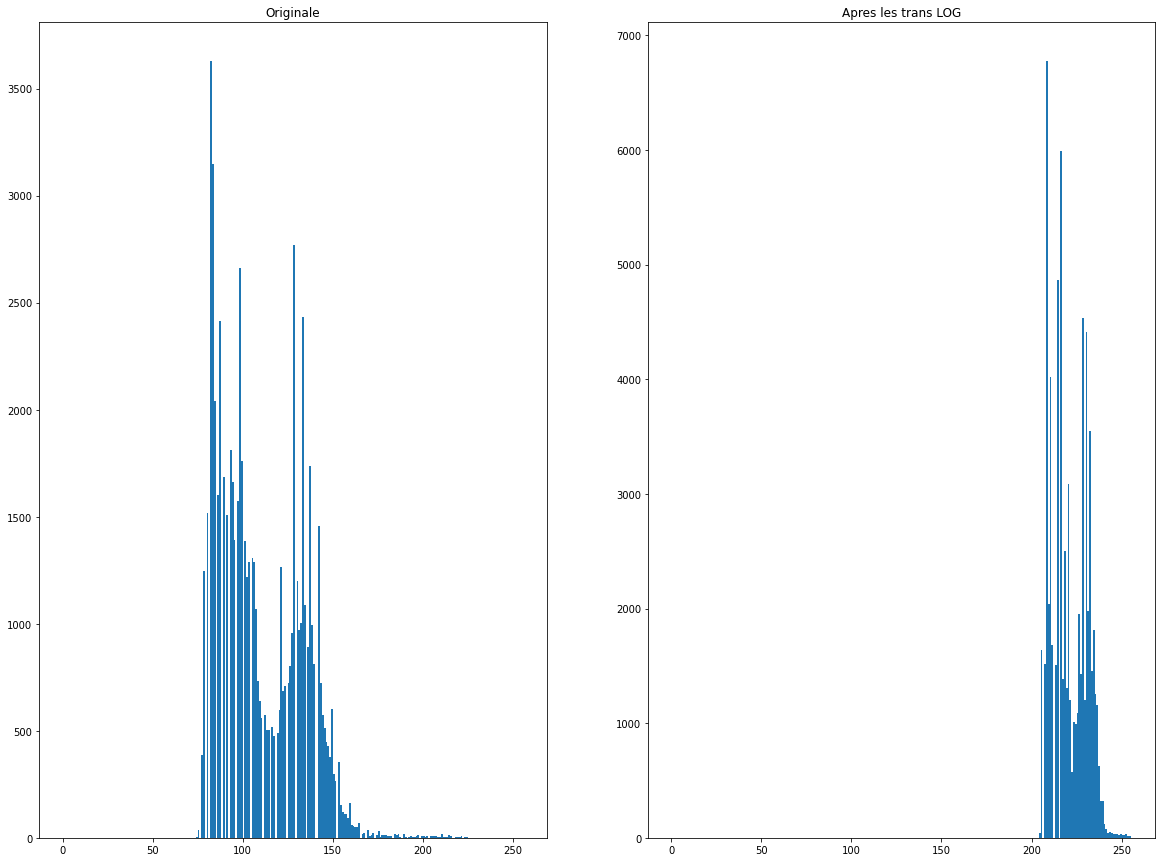

In [6]:
# affichage
cv.imshow('Originale', fft)
cv.imshow('Apres les trans LOG', fft1)

# calcul et affichage de l'histogramme
fig, ax = plt.subplots(1, 2, figsize=(20,15))

ax[0].hist(img.ravel(), 256, [0, 256])
ax[0].set_title(label="Originale")

ax[1].hist(img1.ravel(), 256, [0, 256])
ax[1].set_title(label="Apres les trans LOG")

plt.show()

# attendre la fermeture des fenètres
cv.waitKey(delay=0)
cv.destroyAllWindows()